#  Bio 724: Introduction to Pandas


[Pandas](https://pandas.pydata.org/) is a widely used Python library for working with tabular data. The convention that Pandas adopts when working with tabular data is one in which the rows of the data represent the "cases", "observations", or "entities" we're studying (e.g. individuals in a population, genomic features, geographical regions, etc) and the columns of the table represent the variables of interest that have been determined or measured or recorded for those cases or entities (e.g. gene identifiers, sequence length, measures of expression, etc). This "Cases in rows, variables in columns" structuring is similar to R data frame conventions.

![Image from Pandas tutorial.](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

## Two new data structures: DataFrames and Series

Pandas provides two core data structures -- DataFrames and Series.  If you're familiar with R, the idea of a data frame for representing tabular data is already familiar.  

* Panda's DataFrames have many similarities with R data frames, though there are some important differences in indexing and DataFrame manipulation that we'll highlight.

* The columns of a DataFrame are represented by Series objects.  You can think of Series objects as being akin to fancy Numpy arrays; like arrays they are homogeneous with respect to the data they hold (all entries must be of the same type).

## Series and DataFrame are indexed by both labels and integer position

* Both Series and Dataframe objects is they support two types of indexing -- "label" indexing and positional indexing.

* Both types of indices can be used to access subsets of rows

* Label indices are used to match up rows when data frames are created or joined.

* For DataFrames, both rows and columns have label indices

## Libraries

In [1]:
import pandas as pd  # standard alias for Pandas library
import numpy as np   # numpy is often used hand in hand with Pandas

### Creating Series

Let's see how to create Series manually.  

In the first example, we just specify the contents of the series. In this case Pandas will create a label index for you using the integers 0...len(data) - 1.

In the second and third examples we specify the index, either explicitly or by initializing the Series constructor with a dictionary.

In [2]:

# Create a Series, letting Pandas use the default label index (integers
s1a = pd.Series(["paul", "greg", "jesse", "emily", "kathleen"])

# Create a Series, explicitly giving a label index
s1b = pd.Series(["paul", "greg", "jesse", "emily", "kathleen"], index = ["a", "b", "c", "d", "e"])

# You can create a Series from a dictionary. The keys become the indices
s2 = pd.Series( 
    {"a": "FFSC 4103", 
     "b": "FFSC 4104", 
     "c": "BioSci 303", 
     "d": "FFSC 3313", 
     "e": "Bio Sci 358"}
)


In [3]:
s1a

0        paul
1        greg
2       jesse
3       emily
4    kathleen
dtype: object

In [4]:
s1b

a        paul
b        greg
c       jesse
d       emily
e    kathleen
dtype: object

In [5]:
s2

a      FFSC 4103
b      FFSC 4104
c     BioSci 303
d      FFSC 3313
e    Bio Sci 358
dtype: object

In [6]:
# let's look at the label indices of each

print("s1a index: ", s1a.index)
print("s1b index: ", s1b.index)
print("s2 index: ", s2.index)

s1a index:  RangeIndex(start=0, stop=5, step=1)
s1b index:  Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
s2 index:  Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


### Label indexing of Series

For the Series `s1a` created above, the label indices are the integers 0..4.  We can get the corresponding items associated with these label indices using square brackets:

In [7]:
s1a[0]

'paul'

In [8]:
s1a[3]

'emily'

For the Series `s1b` and `s2` the label indices are the ascii letters a..e. Again, we can get the corresponding items using these label indices:

In [9]:
s1b["b"]

'greg'

In [10]:
s2["e"]

'Bio Sci 358'

You can index a Series with a list of label indices:

In [11]:
s1a[[0, 2, 4]]

0        paul
2       jesse
4    kathleen
dtype: object

In [12]:
s1b[["a", "c", "e"]]

a        paul
c       jesse
e    kathleen
dtype: object

### Slicing with label indices

You can create slices with label indices, but unlike lists and numpy arrays, **the beginning and ending indices are inclusive**:

In [13]:
s1b["c":"e"]  # slice index of labels

c       jesse
d       emily
e    kathleen
dtype: object

### Label indices don't refer to integer positions, even when they're integers

For the Series `s1a` the default label indices were the integers 0..4. Despite this, indexing as show above does NOT refer to integer positions. Let's illustrate this by rearranging the rows using the `sort_values()` method:

In [14]:
s1a_sorted = s1a.sort_values()
s1a_sorted

3       emily
1        greg
2       jesse
4    kathleen
0        paul
dtype: object

Even though we've rearranged the rows, the label indices still refer to the same elements as the original Series.

In [15]:
s1a_sorted[0] # still yields Paul, even though that element is at the end of the list

'paul'

In [16]:
s1a_sorted[3] # still yields Emily, even though that element is at the beginning of the list

'emily'

In [17]:
# s1a_sorted[-1] # this raises an error because we have no -1 label index

### Positional indexing using the `iloc` attribute

If we want to do "traditional" integer indexing of a series (or DataFrame) we need to use the `iloc` (integer location) attribute.  This works regardless of the type of label index the Series has:

In [18]:
s1a.iloc[0]  # get the first item

'paul'

In [19]:
s1a.iloc[1], s1a.iloc[1], s2.iloc[1]

('greg', 'greg', 'FFSC 4104')

In [20]:
s1a.iloc[[0, 2, 4]]

0        paul
2       jesse
4    kathleen
dtype: object

In [21]:
s1a.iloc[-1]

'kathleen'

## Boolean indexing of Series

In [22]:
np.random.seed(20240212)  # set the random seed so we all get the same values

s = pd.Series(np.random.random(10))
s

0    0.305492
1    0.917426
2    0.745677
3    0.948031
4    0.525828
5    0.454755
6    0.519769
7    0.051748
8    0.820818
9    0.378930
dtype: float64

In [23]:
s > 0.5  # comparison operators work element-wise, returning a new series filled with logical values

0    False
1     True
2     True
3     True
4     True
5    False
6     True
7    False
8     True
9    False
dtype: bool

In [24]:
s[s > 0.5]  # We index s with a boolean Series (boolean indexing), returns all rows where the boolean Series was true

1    0.917426
2    0.745677
3    0.948031
4    0.525828
6    0.519769
8    0.820818
dtype: float64

In [25]:
extremes = s[(s > 0.9) | (s < 0.1)]   # Boolean indexing with OR (|) operator
extremes

1    0.917426
3    0.948031
7    0.051748
dtype: float64

In [26]:
s[(s > 0.5) & (s < 0.75)]   # Boolean indexing with OR operator

2    0.745677
4    0.525828
6    0.519769
dtype: float64

### Useful series methods

In [27]:
s.head()  # head and tail of a Series

0    0.305492
1    0.917426
2    0.745677
3    0.948031
4    0.525828
dtype: float64

In [28]:
a = s1b.get("b")  # get() method returns item at given index
b = s1b.get("f")  # if doesn't exist, returns None by default
c = s1b.get("f", "No entry!") # or you can change what is returned if doesn't exist

a, b, c

('greg', None, 'No entry!')

In [29]:
s1b.sort_values()  # sort by values in the series, return new Series

d       emily
b        greg
c       jesse
e    kathleen
a        paul
dtype: object

In [30]:
s4 = pd.Series([3, 4, 1, 2, np.pi])
s4


0    3.000000
1    4.000000
2    1.000000
3    2.000000
4    3.141593
dtype: float64

In [31]:
# max, min, mean, etc -- excludes NA values by default
s4.max(), s4.min(), s4.mean(), s4.std(), s4.median(), s4.quantile(0.75)

(4.0, 1.0, 2.6283185307179586, 1.154265232356965, 3.0, 3.141592653589793)

In [32]:
s4.nlargest(2)

1    4.000000
4    3.141593
dtype: float64

In [33]:
s4.cumsum()

0     3.000000
1     7.000000
2     8.000000
3    10.000000
4    13.141593
dtype: float64

In [34]:
s4.to_numpy() # converts to numpy array

array([3.        , 4.        , 1.        , 2.        , 3.14159265])

## Plotting w/Series

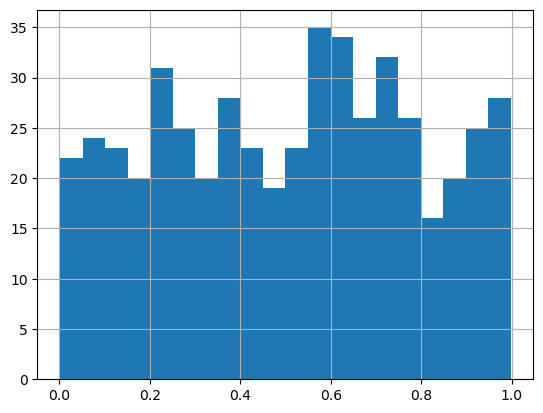

In [35]:
uniform_random = pd.Series(np.random.random(500))
uniform_random.hist(bins=20)
pass

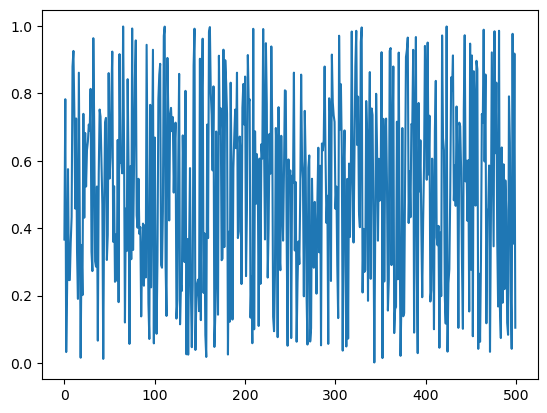

In [36]:
uniform_random.plot()
pass

## Creating DataFrames from Series

DataFrames are collections of Series, so it's straightforward to create DataFrames for existing series.

If the Series have the same label indices, than corresponding elements of the Series are matched based on the labels.

In [37]:
s1b # uses labels a...e

a        paul
b        greg
c       jesse
d       emily
e    kathleen
dtype: object

In [38]:
s2 # uses label a...e

a      FFSC 4103
b      FFSC 4104
c     BioSci 303
d      FFSC 3313
e    Bio Sci 358
dtype: object

In [39]:
instructors = pd.DataFrame({"Name": s1b, "Room": s2})
instructors

,Name,Room
a,paul,FFSC 4103
b,greg,FFSC 4104
c,jesse,BioSci 303
d,emily,FFSC 3313
e,kathleen,Bio Sci 358


In [40]:
s1a  # doesn't use labels a...e

0        paul
1        greg
2       jesse
3       emily
4    kathleen
dtype: object

In [41]:
# if Series label indices don't match, treats as separate rows
instructors_mismatched = pd.DataFrame({"Name": s1a, "Room": s2})
instructors_mismatched

,Name,Room
0,paul,NaN
1,greg,NaN
2,jesse,NaN
3,emily,NaN
4,kathleen,NaN
a,NaN,FFSC 4103
b,NaN,FFSC 4104
c,NaN,BioSci 303
d,NaN,FFSC 3313
e,NaN,Bio Sci 358


## Reading a DataFrame from a file

Typically we load tabular data from files. Pandas includes a variety of `read_*` functions such as `read_csv` and `read_excel` for reading such data. `read_table`can read tables delimited with either commas ("comma separated values" = `.csv` files) or tabs ("tab separated values" = `.tsv` files) depending on the `sep` (separator) argument.

In [42]:
import pandas as pd
import numpy as np  # we'll import numpy as well, as it will be useful for calculations

In [43]:
# read a test spreadsheet 
df = pd.read_table("CoV2-genes.tsv", sep="\t")  

In [44]:
df

,Gene,Start,Stop,Product
0,Orf1ab,266,21555,ORF1ab polyprotein
1,S,21563,25384,surface glycoprotein
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein
4,N,28274,29533,nucleocapsid phosphoprotein


### Creating a dataframe from a dictionary

You can also create a dataframe manually by passing a dictionary where the keys are the column names and the values are lists (or other iterables) with the entries for the corresponding column. If you don't specify and index, Pandas will create a numerical index for you automatically.

In [45]:
df = pd.DataFrame(
    {
    "Gene": ["ORF1ab", "S", "E", "M", "N"],
    "Start": [266,  21563, 26245, 26523, 28274],
    "Stop": [21555, 25384, 26472, 27191, 29533],
    "Product": ["ORF1ab polyprotein", "surface glycoprotein", 
                "envelope protein", "membrane glycoprotein",
                "nucleocapsid phosphoprotein"]
    }
)


df

,Gene,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein
1,S,21563,25384,surface glycoprotein
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein
4,N,28274,29533,nucleocapsid phosphoprotein


### Basic attributes of DataFrames

In [46]:
# the type of a DataFrame object
type(df)

pandas.core.frame.DataFrame

In [47]:
# Get the names of the columns in the DataFrame
df.columns

Index(['Gene', 'Start', 'Stop', 'Product'], dtype='object')

In [48]:
# Get the data types of each column
df.dtypes

Gene       object
Start       int64
Stop        int64
Product    object
dtype: object

In [49]:
# dimensions of the data frame
df.shape

(5, 4)

In [50]:
# number of rows (cases)
len(df)

5

In [51]:
# More detailed info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Gene     5 non-null      object
 1   Start    5 non-null      int64 
 2   Stop     5 non-null      int64 
 3   Product  5 non-null      object
dtypes: int64(2), object(2)
memory usage: 292.0+ bytes


In [52]:
df.index  # returns row label index

RangeIndex(start=0, stop=5, step=1)

### Indexing a DataFrame with a single column name returns a Series

In [53]:
df["Gene"]

0    ORF1ab
1         S
2         E
3         M
4         N
Name: Gene, dtype: object

In [54]:
type(df["Gene"])

pandas.core.series.Series

In [55]:
# Series objects are column vectors, they have a shape and datatype

df["Gene"].shape, df["Gene"].dtype

((5,), dtype('O'))

In [56]:
# The length of a Series object is the number of rows
len(df["Gene"])

5

When a column name would also be a valid Python variable name, there is a short-hand way to access columns, as if they were attributes of the DataFrame, like so:

In [57]:
df.Gene

0    ORF1ab
1         S
2         E
3         M
4         N
Name: Gene, dtype: object

### Indexing a DataFrame with more than one column name returns a new DataFrame

In [58]:
df[["Gene", "Product"]]

,Gene,Product
0,ORF1ab,ORF1ab polyprotein
1,S,surface glycoprotein
2,E,envelope protein
3,M,membrane glycoprotein
4,N,nucleocapsid phosphoprotein


In [59]:
type(df[["Gene", "Product"]])

pandas.core.frame.DataFrame

### Indexing a DataFrame with an integer slice returns rows by integer position

You can use ordinary integer slice indexing to return a contiguous set of rows, but you **CAN NOT** use plain integer indexing to return a single row (see discussion of `iloc` below).

In [60]:
# df[0]  # <-- this wont work, try it and see what the error says

In [61]:
df[0:1]  # <- but this does work to get a single row (note non-inclusive end)

,Gene,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein


In [62]:
df[:2]  # slice first two rows

,Gene,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein
1,S,21563,25384,surface glycoprotein


In [63]:
df[2:] # slice from row 3 on

,Gene,Start,Stop,Product
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein
4,N,28274,29533,nucleocapsid phosphoprotein


In [64]:
df[::2]  # get every other row

,Gene,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein
2,E,26245,26472,envelope protein
4,N,28274,29533,nucleocapsid phosphoprotein


In [65]:
df[::-1]  # reverse the data frame

,Gene,Start,Stop,Product
4,N,28274,29533,nucleocapsid phosphoprotein
3,M,26523,27191,membrane glycoprotein
2,E,26245,26472,envelope protein
1,S,21563,25384,surface glycoprotein
0,ORF1ab,266,21555,ORF1ab polyprotein


### Label and positional indexing of DataFrames

We've already seen above that indexing of DataFrames defaults to the label indices on the columns. Let's explore more complicated indexing  

In [66]:
df

,Gene,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein
1,S,21563,25384,surface glycoprotein
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein
4,N,28274,29533,nucleocapsid phosphoprotein


When you index a DataFrame with an integer slice instead of a string, this returns the specified range of rows (obeying Python's standard 0-indexing conventions).  Not that row indexing like this requires a slice; a single integer index won't work with DataFrames.

In [67]:
df[1:3] 

,Gene,Start,Stop,Product
1,S,21563,25384,surface glycoprotein
2,E,26245,26472,envelope protein


### Getting specific rows from a DataFrame using slices

When you index a DataFrame with an integer slice instead of a string, this returns the specified range of rows (obeying Python's standard 0-indexing conventions).  Not that row indexing like this requires a slice; a single integer index won't work with DataFrames.

In [68]:
df[0:2]  # get the first two rows

,Gene,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein
1,S,21563,25384,surface glycoprotein


In [69]:
df[:1]  # to get the first row I still had to use the slice syntax; df[0] won't work

,Gene,Start,Stop,Product
0,ORF1ab,266,21555,ORF1ab polyprotein


### Getting subset of rows and columns from a DataFrame using `loc`

If you want to simultaneously get a subset of rows and/or columns, you can use the `DataFrame.loc` (location) attribute. 

An important point about using `loc` is that when specifing the row slice, the labels correspond not to the integer position along the rows but rather the indexing labels.  When you create a DataFrame, you can specify a set of index labels for the rows.  If you don't specify such labels, Pandas will create a set of default indexing labels based on the integer positions.  This is what is being shown by the numbers in bold on the left margin of the data frames when we display them in this notebook.  The `loc` attribute allows us to create slices based on these row index labels, but these these index label slices differ from the positional slices in that they are inclusive (both start and stop labels are included).  I'll do my best to illustrate how this works below with some examples.

First let's see how to get a specific subset of rows and columns using `loc`:

In [70]:
# get rows with the index labels 3 and 1, and columns "Product" and "Start"
df.loc[[3, 1], ["Product","Start"]]  

,Product,Start
3,membrane glycoprotein,26523
1,surface glycoprotein,21563


We can slice ranges of rows and columns using `loc`:

In [71]:
# all rows, columns from Gene to Stop
df.loc[:, "Gene":"Stop"]

,Gene,Start,Stop
0,ORF1ab,266,21555
1,S,21563,25384
2,E,26245,26472
3,M,26523,27191
4,N,28274,29533


However if we specify a slice on the rows, notice how it uses the label indices on the left to specify what rows to take, and also notice that the slice is inclusive of the last specified row (if this was instead based on Python's standard positional indexing the statement below would be expected to return only two rows):

In [72]:
df.loc[1:3, ["Gene","Product"]]

,Gene,Product
1,S,surface glycoprotein
2,E,envelope protein
3,M,membrane glycoprotein


In [73]:
df.loc[1]

Gene                          S
Start                     21563
Stop                      25384
Product    surface glycoprotein
Name: 1, dtype: object

In [74]:
df.loc[[1,2,3]]

,Gene,Start,Stop,Product
1,S,21563,25384,surface glycoprotein
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein


In [75]:
df.loc[1:3]  # note bounds are INCLUSIVE!

,Gene,Start,Stop,Product
1,S,21563,25384,surface glycoprotein
2,E,26245,26472,envelope protein
3,M,26523,27191,membrane glycoprotein


In [76]:
# df.loc[1:3, 2:4]  won't work, because need appropriate column index
df.loc[1:3, "Gene":"Stop"]

,Gene,Start,Stop
1,S,21563,25384
2,E,26245,26472
3,M,26523,27191


### Selecting cross sections of a DataFrame by integer positions using `DataFrame.iloc`

`DataFrame.iloc` eanbles conventional indexing of both rows and columns by integer position, as illustrated below:

In [77]:
df.iloc[:3, :2]

,Gene,Start
0,ORF1ab,266
1,S,21563
2,E,26245


In [78]:
df.iloc[0,2]  # value in the first row, third column

21555

In [79]:
df.iloc[[2,0],[0,3]]

,Gene,Product
2,E,envelope protein
0,ORF1ab,ORF1ab polyprotein


### Creating new columns by computing on existing columns

DataFrames support a simple syntax for creating new columns from existing ones.  Like numpy arrays, most operations with data frame columns work element-by-element so we can calculate new variables of interest from existing ones by applying functions or operations to one or more of the variables.

Here I show how to create a new column "Length" by subtracting the Start coordinates from each of the Stop coordinates. Note the calculation accounts for the fact that the gene length is inclusive of both the Start and Stop coordinates.

In [80]:
df["Length"] = df.Stop - df.Start + 1
df

,Gene,Start,Stop,Product,Length
0,ORF1ab,266,21555,ORF1ab polyprotein,21290
1,S,21563,25384,surface glycoprotein,3822
2,E,26245,26472,envelope protein,228
3,M,26523,27191,membrane glycoprotein,669
4,N,28274,29533,nucleocapsid phosphoprotein,1260


### Subsetting the rows of a DataFrame by Boolean indexing

When working with large data sets, we frequently want to explore how variables of interest differ across different subsets of the cases.  Pandas (and Numpy) facilitate this sort of analysis by allowing us to subset rows of a DataFrame using Boolean indexing.

To illustrate this we'll look at ways to subset our small data frame to get at genes that meet certain criteria.

The COVID-19 genome is about 30 Kbp in length.  Consider the case where we want to find only those genes towards the "right" end of the genome (i.e. with respect to the arbitrary coordinate system the reference genome has been assigned is reported).  One way to do this would be to find all those genes for which the "Start" value is greater than some cutoff, say 25,000.

Let's see what happens when we compare each of the values (rows) in the "Start" column and asks whether the corresponding value is greater than 25000.  

In [81]:
df["Start"] > 25000

0    False
1    False
2     True
3     True
4     True
Name: Start, dtype: bool

As you see, we get back a column (Series) of Boolean (True/False) values indicating for which of the corresponding elements the comparison is True.

Since that statement return a Boolean series, we can use it directly to index the rows of our data frame. You might find it useful to read think about the following Python case as saying "df where df.Start is greater than 25000".

In [82]:
df[df["Start"] > 25000]

,Gene,Start,Stop,Product,Length
2,E,26245,26472,envelope protein,228
3,M,26523,27191,membrane glycoprotein,669
4,N,28274,29533,nucleocapsid phosphoprotein,1260


Boolean indexing like this creates a new DataFrame, which we'd typically we'd assign to a variable so would do further computations with it.

In [83]:
endgenes = df[df["Start"] > 25000]
endgenes

,Gene,Start,Stop,Product,Length
2,E,26245,26472,envelope protein,228
3,M,26523,27191,membrane glycoprotein,669
4,N,28274,29533,nucleocapsid phosphoprotein,1260


### More complex subsetting using Boolean operators

Pandas defines the logical operators `&` (and) and `|` (or) for working with Boolean Series.  For example, the following returns a Boolean Series corresponding to the rows of our data frame where the start position was greater than 25,000 and the gene length was greater than 500.

In [84]:
end_and_long = (df.Start > 25000) & (df.Length > 500)
end_and_long

0    False
1    False
2    False
3     True
4     True
dtype: bool

Again, the final result is a single Boolean series which we can use to filter or subset the rows of our data frame:

In [85]:
df[end_and_long]

,Gene,Start,Stop,Product,Length
3,M,26523,27191,membrane glycoprotein,669
4,N,28274,29533,nucleocapsid phosphoprotein,1260


### Creating plots from DataFrames

When generating plots from data in Pandas DataFrames you can pass variables of interest to the respective `matplotlib` functions or use plotting attributes associated with the DataFrame object (which in turn uses matplotlib as it's backend).  I illustrate both approaches below.

In [86]:
from matplotlib import pyplot as plt

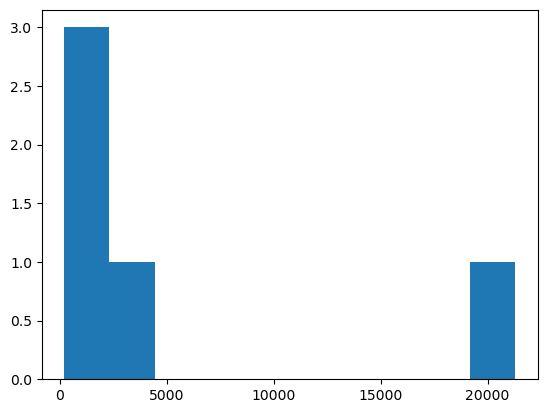

In [87]:
# generate a histogram of genes Lengths
plt.hist(df.Length)

pass # adding pass here prevents the data objects returned from 
     # plt.hist from being printed in the output. This is just to make
     # the notebook output look neat and tidy.

Using the `plot` attribute associated with DataFrames:

<Axes: ylabel='Frequency'>

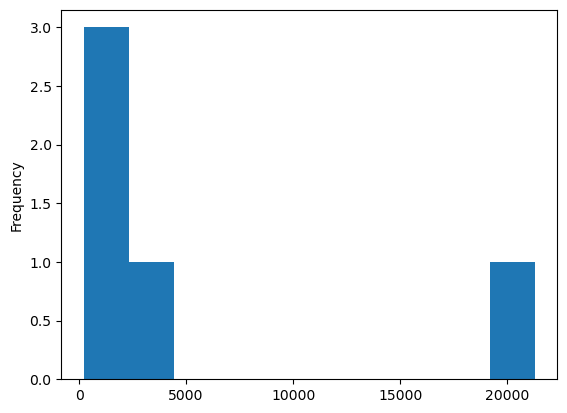

In [88]:
df.Length.plot.hist()

### Summary statistics from DataFrames

Numerical columns in DataFrame support built-in methods for calculating summary statistics:

In [89]:
df.Length.mean()  # average length of the genes

5453.8

In [90]:
df.Length.median() # median length of the genes

1260.0

In [91]:
df.Length.describe()  # mulitiple summary statistics about the values in the Length column

count        5.000000
mean      5453.800000
std       8961.574315
min        228.000000
25%        669.000000
50%       1260.000000
75%       3822.000000
max      21290.000000
Name: Length, dtype: float64